<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[8차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>○ 에지 추출 방법에 대해 학습한다.<br><br>
○ 이미지 필터링 방법에 대해 학습한다.
</font></td></tr>   
</table>        

# 에지 개념 및 종류

## 에지 개념

- 에지 (Edge) : 이미지에서 픽셀값 (밝기)가 급격하게 변하는 부분 - 경계선, 윤곽선 (Contour)
    - 에지는 특성 추출할 때도 쓰지만 얼마나 선명한지 판단할 때에도 사용한다. (카메라 포커스 조정 가능)

<img src="./lecture_image/08_edge01.png" width=60%>


- 에지 검출 방법
  - 1차 미분 : Sobel 에지 추출기, Prewitt 에지 추출기, Robert 에지 추출기
  - 2차 미분 : 라플라시안 에지 추출기, LoG, DoG
  - Canny 에지 추출기
  - Line 에지 추출기


- 에지의 용도 : 물체의 모양, 위치, 크기 등에 대한 정보

## Sobel 에지 추출기

- 에지 추출의 가장 대표적인 1차 미분 연산자 중 하나
- 모든 방향의 에지를 추출
- 잡음에 대체적으로 강하지만 대각선 방향의 에지에 더 민감하게 반응
- 소벨 마스크의 모양

<img src="./lecture_image/08_edge02.png" width=40%>

- <font color=red>cv2.Sobel(src, depth, dx, dy, ksize)</font>
    - depth : 출력 이미지의 데이터 타입 (-1 이면 입력과 동일), 출력 이미지의 정밀도
    - dx : x 방향 미분 차수
    - dy : y 방향 미분 차수
    - ksize : 커널 크기 (홀수 값을 사용하며, 최대 31까지 설정)
    
    
- <font color=red>return = cv2.addWeighted(x, a, y, b, c)</font>   
  - 두 이미지를 각각 가중치를 주어 합침
  - 가중치의 값이 큰 이미지가 좀더 선명하게 나타남 
  - result = x * a + y * b + c

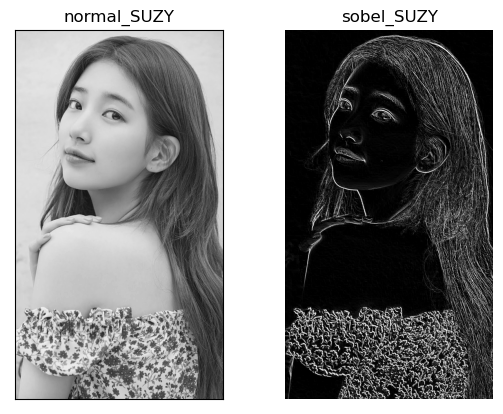

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./image/suzy.jfif', cv2.IMREAD_GRAYSCALE)

#  sobel 에지 계산
# 수직마스크
sobel_x = np.array([[1,2,1],
                    [0,0,0,],
                    [-1,-2,-1]])
# 수평마스크 
sobel_y = np.array([[-1,0,1],
                    [-2,0,2,],
                    [-1,0,1]])

# 소벨 필터 사용
# filter20 : 이미지에 필터를 컨벌루션
# conertScaleAbs : 음수를 양수로 변환
result_x = cv2.convertScaleAbs(cv2.filter2D(img, -1, sobel_x))  #음수 나올까봐 절대값 씌워준다.
result_y = cv2.convertScaleAbs(cv2.filter2D(img, -1, sobel_y))

# result_x * 1, + 0, result_y * 1 + 0  이런식으로 가중치를 부여해주는 함수
result = cv2.addWeighted(result_x, 1, result_y, 1, 0)

plt.subplot(1,2,1)
plt.xticks([]); plt.yticks([])
plt.title('normal_SUZY')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.axis("off")  #이렇게도 축을 없앨 수 있다. = xticks, yticks 
plt.title('sobel_SUZY')
plt.imshow(result, cmap='gray')

## Canny 에지 추출기

- <font color=red>cv2.Canny(src, minVal maxVal)</font>   
  - minVal : 인접한 에지와 연결 여부를 판단하는 임계값 - 작으면 에지와 에지를 더 많이 연결 (경계를 결정해줌)
  - maxVal : 에지 여부 판단하는 임계값 - 작으면 에지가 더 많이 검출
  
  
- Canny 연산자는 픽셀의 변화분이 maxVal이상이면 에지 (강한 에지)로 
- 사이값이면 연결성으로 에지로 판단 (약한 에지)하고 
- 픽셀의 변화분이 minVal 이하이면 에지가 아니라고 판단 

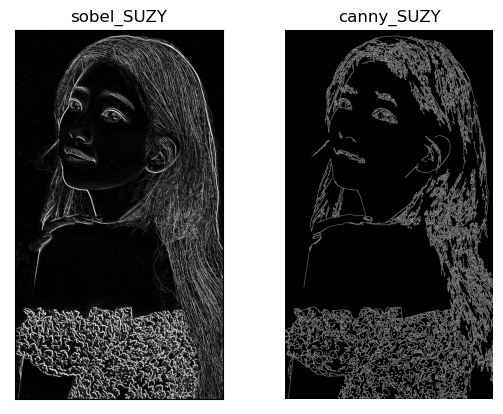

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

canny=cv2.Canny(img, 50, 350)

plt.subplot(1,2,1)
plt.xticks([]); plt.yticks([])
plt.title('sobel_SUZY')
plt.imshow(result, cmap='gray')

plt.subplot(1,2,2)
plt.axis("off")  
plt.title('canny_SUZY')
plt.imshow(canny, cmap='gray')

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다른 에지 검출기를 사용하여 에지 구하기<br><img src="./lecture_image/08_edge04.png" width=30%></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/08_edge03.png" width=60%></td></tr>   
</table>

## 이미지 선명도 분석

### Laplacian 필터 이용
- 2차미분이라서 x방향 y방향 동시에 함 (1차 미분은 따로 함)

- <font color=red>Laplacian(src, depth)</font>
  - src : 입력 영상
  - ddepth : 출력영상 데이터 타입, -1이면 입력 영상과 같은 데이터 타입 사용.

  
- 필터의 형태

<img src="./lecture_image/08_edge05.png" width=60%>

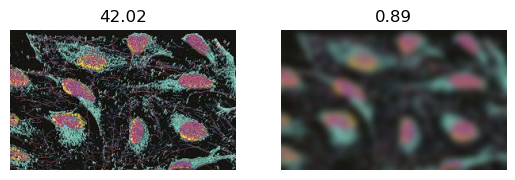

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('./image/cell1.jpg', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread('./image/cell2.jpg', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

# 선명도 계산 (에지 픽셀값들의 평균) #하얀색이 많으면 선명, 적으면 흐릿
def1 = np.average(cv2.convertScaleAbs(cv2.Laplacian(img_gray1, -1)))
def2 = np.average(cv2.convertScaleAbs(cv2.Laplacian(img_gray2, -1)))

plt.subplot(1,2,1)
plt.axis("off") 
plt.title("{:.2f}".format(def1))
plt.imshow(img1, cmap='gray')

plt.subplot(1,2,2)
plt.axis("off")  
plt.title("{:.2f}".format(def2))
plt.imshow(img2, cmap='gray')

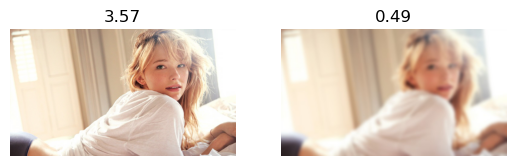

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('./image/bennett.jfif', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread('./image/bennett2.jpg', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

# 선명도 계산 (에지 픽셀값들의 평균) #하얀색이 많으면 선명, 적으면 흐릿
def1 = np.average(cv2.convertScaleAbs(cv2.Laplacian(img_gray1, -1)))
def2 = np.average(cv2.convertScaleAbs(cv2.Laplacian(img_gray2, -1)))

plt.subplot(1,2,1)
plt.axis("off") 
plt.title("{:.2f}".format(def1))
plt.imshow(img1, cmap='gray')

plt.subplot(1,2,2)
plt.axis("off")  
plt.title("{:.2f}".format(def2))
plt.imshow(img2, cmap='gray')

### 다른 선명도 계산법

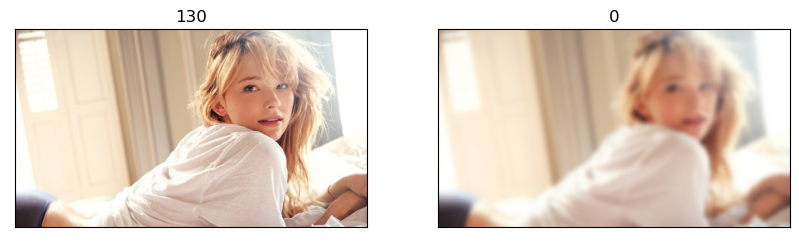

In [37]:
# 선명도 계산 (에지값을 제곱하고 평균을 구함)
def get_Definition(img):
    sum_data = 0
    for y in range(0, len(img), 1):
        for x in range(0, len(img[y]), 1):
            # 값들을 제곱을 해서 더함 (구분을 쉽게하기 위해서)
            sum_data += (int(img[y, x]) ** 2)
    # 값들의 평균을 계산  (평균하기전에 픽셀값의 제곱을 해서 평균해버림)
    sum_data = sum_data / (len(img) * len(img[y]))
    return int(sum_data)
# 소벨 필터링
img_data1 = cv2.convertScaleAbs(cv2.Laplacian(img_gray1, -1))
img_data2 = cv2.convertScaleAbs(cv2.Laplacian(img_gray2, -1))
# 소벨 필터의 결과로 선명도 계산
definition1 = get_Definition(img_data1)
definition2 = get_Definition(img_data2)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.title(definition1)
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.xticks([]), plt.yticks([])
plt.title(definition2)
plt.imshow(img2)
plt.show()
plt.show()

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 소벨 에지 검출기를 사용하여 선명도 구하기</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/08_edge06.png" width=70%></td></tr>   
</table>

# 이미지 필터

## motion blur 
  - 특정한 방향으로 움직이는 형상을 표현
<img src="./lecture_image/08_blur.png" width=20%>

(-0.5, 692.5, 388.5, -0.5)

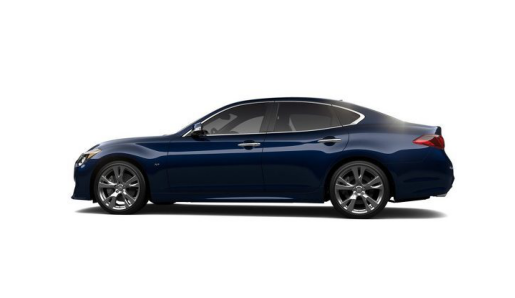

In [43]:
img = cv2.imread('./image/car3.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')

(-0.5, 692.5, 388.5, -0.5)

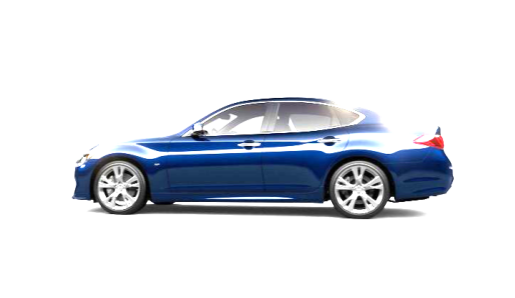

In [45]:
motion_blur = np.array([[0,0,0], 
                        [1,1,1], 
                        [0,0,0]])

img2 = cv2.filter2D(img, -1, motion_blur)

plt.imshow(img2)
plt.axis("off")

(-0.5, 692.5, 388.5, -0.5)

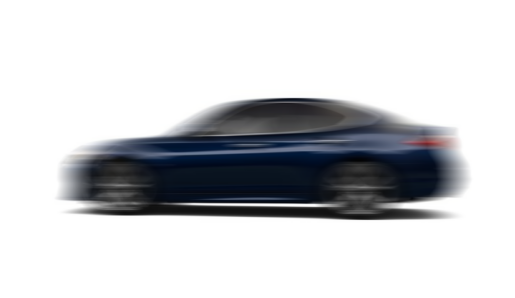

In [58]:
size = 50
kernal_motion_blur = np.zeros((size, size))

#가운데 행만 1을 추가
kernal_motion_blur[int((size-1)/2),:] = np.ones(size)

kernal_motion_blur = kernal_motion_blur/size

img2 = cv2.filter2D(img, -1, kernal_motion_blur)

plt.imshow(img2)
plt.axis("off")

## 엠보싱(embossing) 필터

  - 블록 뛰어나오는 듯한 느낌을 주는 효과
<img src="./lecture_image/08_embossing.png" width=20%>

(-0.5, 692.5, 388.5, -0.5)

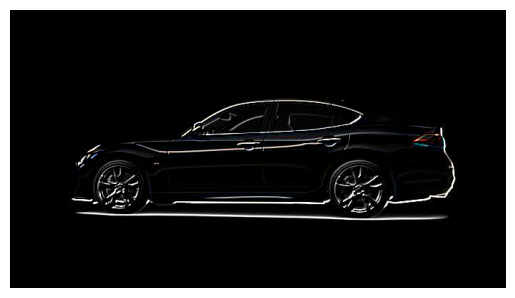

In [59]:
embossing = np.array([[-1,-1,0],[-1,0,1],[0,1,1]])
img2 = cv2.filter2D(img, -1, embossing)
plt.imshow(img2)
plt.axis("off")

In [8]:
#실습

## 샤프닝 (sharpnin) 필터
  
  - 이미지의 에지 성분을 날카롭게 하는 효과

<img src="./lecture_image/08_sharpning.png" width=20%>

(-0.5, 692.5, 388.5, -0.5)

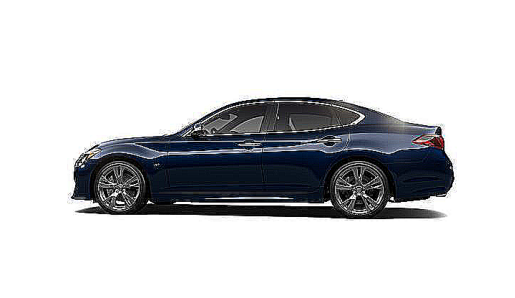

In [60]:
embossing = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
img2 = cv2.filter2D(img, -1, embossing)
plt.imshow(img2)
plt.axis("off")

## 감마(Gamma) 보정
  - 이미지가 너무 어둡거나 밝은 경우, 픽셀 값의 변화를 통해 밝기를 보정하는 작업
  - gamma > 1 : 어두운 영역의 변화폭은 크고 밝은 영역의 변화폭은 작음 → 어두웠던 영역만 잘 보이게 됨

  - 반대로 gamma < 1 : 밝은 영역의 변화폭이 크고 어두운 영역의 변화폭은 작음 → 밝은 영역만 잘 보이게 됨. 
  <img src="./lecture_image/08_gamma_eq.png" width=40%>
  <img src="./lecture_image/08_gamma.png" width=40%>

(-0.5, 530.5, 399.5, -0.5)

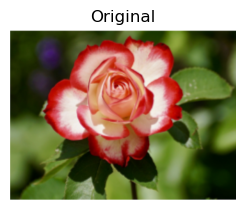

In [65]:
#실습 flower.PNG

img = cv2.imread("./image/flower.PNG", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

In [67]:
# 감마보정 공식
def gamma_correction(image, gamma=1.0):
    inv_gamma = 1 / gamma
    output = np.uint8(((image / 255) ** inv_gamma) * 255)
    return output

(-0.5, 530.5, 399.5, -0.5)

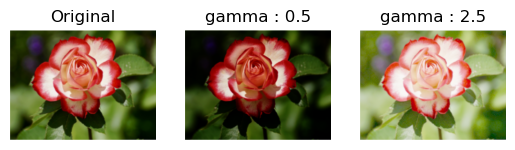

In [72]:
img1 = gamma_correction(img, gamma = 0.5)
img2 = gamma_correction(img, gamma = 2.5)

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img1)
plt.title("gamma : 0.5") # 감마가 1보다 작으면 밝은 부분 잘보임  
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img2)
plt.title("gamma : 2.5")  # 감마가 1보다 크면 어두운 부분 잘보임  

#야간사진 구분 편하게 할 수 있음

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[8차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ 에지 (Edge) : 이미지에서 픽셀값 (밝기)가 급격하게 변하는 부분
        
○ 에지 검출 방법
  - 1차 미분 : Sobel 에지 추출기, Prewitt 에지 추출기, Robert 에지 추출기
  - 2차 미분 : 라플라시안 에지 추출기, LoG, DoG
  - Canny 에지 추출기
  - Line 에지 추출기
○ 에지의 용도 : 물체의 모양, 위치, 크기 등에 대한 정보


○ 이미지 필터
  - motion blur : 특정한 방향으로 움직이는 형상을 표현
  - 엠보싱(embossing) 필터 : 블록 뛰어나오는 듯한 느낌을 주는 효과
  - 샤프닝 (sharpnin) 필터 : 이미지의 에지 성분을 날카롭게 하는 효과

○ 감마(Gamma) 보정 : 이미지가 너무 어둡거나 밝은 경우, 픽셀 값의 변화를 통해 밝기를 보정하는 작업
  - gamma > 1 : 어두운 영역의 변화폭은 크고 밝은 영역의 변화폭은 작음 → 어두웠던 영역만 잘 보이게 됨
  - gamma < 1 : 밝은 영역의 변화폭이 크고 어두운 영역의 변화폭은 작음 → 밝은 영역만 잘 보이게 됨.      
        
        
</font></td></tr>   
</table>
